objective: predicting covid-19 pandemi

data_collection

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Collecting Data 

In [14]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,5,5,5,6,6
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


### Data Cleaning

In [75]:
new_df = df.groupby(by = 'Country/Region' , axis=0, squeeze=True).sum()
new_df['Region'] = new_df.index
new_df.reset_index(drop=True , inplace=True)
cols = ['Region'] + list(new_df.columns[:-1])
new_df = new_df[cols]
new_df[new_df['Region']=='China']

,Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
36,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,83787,83805,83817,83853,83868,83884,83899,83909,83912,83918


In [89]:
cols = new_df.columns[3:]
cleared_df = new_df.copy()
for i in range(1,len(cols)):
    cleared_df[cols[i]] = new_df[cols[i]] - new_df[cols[i-1]]
df = cleared_df.copy()
df.head()

,Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,27,63,30,66,84,103,72,112,68,172
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,9,14,22,25,25,29,15,34,14,10
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,116,95,89,93,99,97,120,129,126,135
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,8,9,4,0,6,0,8,7,0,5
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,5,0,0,0,1,0,0,0,1,1


### EDA

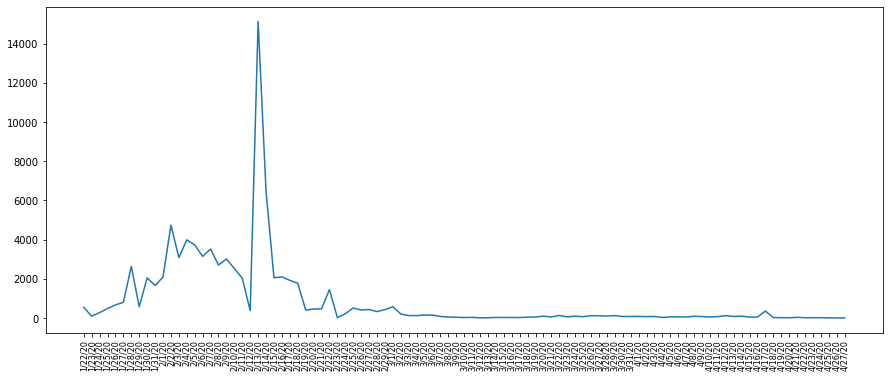

In [149]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90,fontsize = 8) 
plt.plot(cols,df[df['Region']=='China'][cols].values[0])

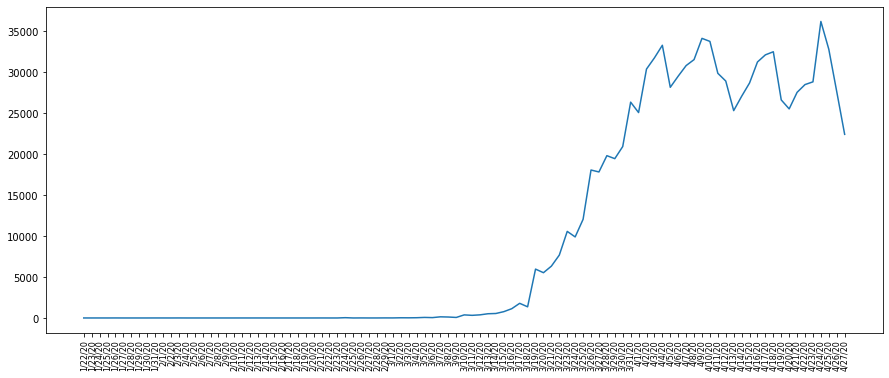

In [156]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90,fontsize = 8) 
plt.plot(cols,df[df['Region']=='US'][cols].values[0])

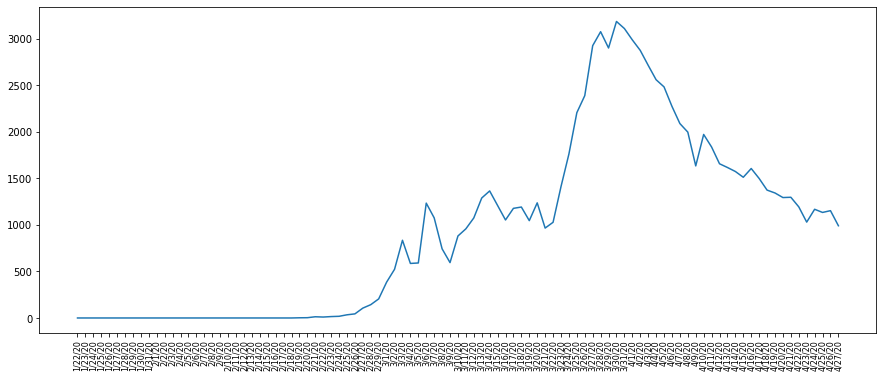

In [157]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90,fontsize = 8) 
plt.plot(cols,df[df['Region']=='Iran'][cols].values[0])

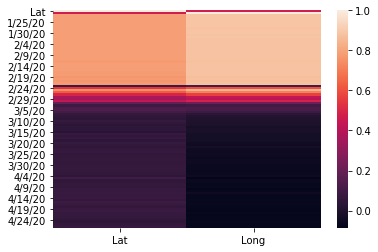

In [166]:
sns.heatmap(df.corr()[['Lat','Long']])

In [167]:
df[df['Region']=="Iran"]

,Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
80,Iran,32.0,53.0,0,0,0,0,0,0,0,...,1374,1343,1294,1297,1194,1030,1168,1134,1153,991
